In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Datasets/amazon_reviews.zip

Archive:  /content/drive/MyDrive/Datasets/amazon_reviews.zip
  inflating: amazon_reviews.csv      


In [ ]:
import pandas as pd
df = pd.read_csv('/content/amazon_reviews.csv')
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [ ]:
df = df[['reviewerName', 'overall', 'reviewText']]
df.head()

,reviewerName,overall,reviewText
0,NaN,4.0,No issues.
1,0mie,5.0,"Purchased this for my device, it worked as adv..."
2,1K3,4.0,it works as expected. I should have sprung for...
3,1m2,5.0,This think has worked out great.Had a diff. br...
4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit..."


In [ ]:
df = df.dropna()

In [ ]:
len(df)

4913

In [ ]:
#PreProcessing

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters, numbers, and punctuations
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Apply the preprocessing function to the "reviewText" column
df['preprocessed_review'] = df['reviewText'].apply(preprocess_text)

df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,reviewerName,overall,reviewText,preprocessed_review
1,0mie,5.0,"Purchased this for my device, it worked as adv...",purchas devic work advertis never much phone m...
2,1K3,4.0,it works as expected. I should have sprung for...,work expect sprung higher capac think made bit...
3,1m2,5.0,This think has worked out great.Had a diff. br...,think work greathad diff bran gb card went sou...
4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",bought retail packag arriv legit orang envelop...
5,2Cents!,5.0,It's mini storage. It doesn't do anything els...,mini storag doesnt anyth els suppos purchas ad...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed text data
tfidf_features = tfidf_vectorizer.fit_transform(df['preprocessed_review'])

# Convert the result to a dense matrix and create a DataFrame
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

tfidf_df.head()

,aa,aac,aba,abdroid,abil,abl,aboutgood,abouti,aboutthereher,aboutto,...,zippi,zl,zone,zoom,zs,zte,ztpad,zumo,zune,zunehd
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Create a binary sentiment label column based on compound scores
df['compound_score'] = df['preprocessed_review'].apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(x)['compound'])
df['predicted_sentiment'] = df['compound_score'].apply(lambda score: 'positive' if score >= 0.05 else 'negative' if score <= -0.05 else 'neutral')

df.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,reviewerName,overall,reviewText,preprocessed_review,compound_score,predicted_sentiment
1,0mie,5.0,"Purchased this for my device, it worked as adv...",purchas devic work advertis never much phone m...,0.0000,neutral
2,1K3,4.0,it works as expected. I should have sprung for...,work expect sprung higher capac think made bit...,0.4019,positive
3,1m2,5.0,This think has worked out great.Had a diff. br...,think work greathad diff bran gb card went sou...,0.2732,positive
4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",bought retail packag arriv legit orang envelop...,0.8591,positive
5,2Cents!,5.0,It's mini storage. It doesn't do anything els...,mini storag doesnt anyth els suppos purchas ad...,0.0000,neutral


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encode the 'predicted_sentiment' column
label_encoder = LabelEncoder()
df['encoded_sentiment'] = label_encoder.fit_transform(df['predicted_sentiment'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

X = tfidf_df
y = df['encoded_sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = XGBClassifier()
model.fit(X_train, y_train)

# Predict sentiments
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.8789420142421159
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.60      0.68       149
           1       0.68      0.83      0.75       105
           2       0.93      0.94      0.93       729

    accuracy                           0.88       983
   macro avg       0.80      0.79      0.79       983
weighted avg       0.88      0.88      0.88       983



In [ ]:
df['predicted_sentiment'].value_counts()

positive    3636
negative     727
neutral      550
Name: predicted_sentiment, dtype: int64

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Use undersampling to balance the classes
undersampler = RandomUnderSampler(sampling_strategy='not minority', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)


# Check the resampled class balance
resampled_class_balance = pd.Series(y_resampled).value_counts()
print("\nResampled Class Balance:")
print(resampled_class_balance)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train an XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict sentiments
predictions = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f"\nAccuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Resampled Class Balance:
0    550
1    550
2    550
Name: encoded_sentiment, dtype: int64

Accuracy: 0.7848484848484848
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       125
           1       0.75      0.91      0.82       104
           2       0.80      0.69      0.74       101

    accuracy                           0.78       330
   macro avg       0.79      0.79      0.78       330
weighted avg       0.79      0.78      0.78       330



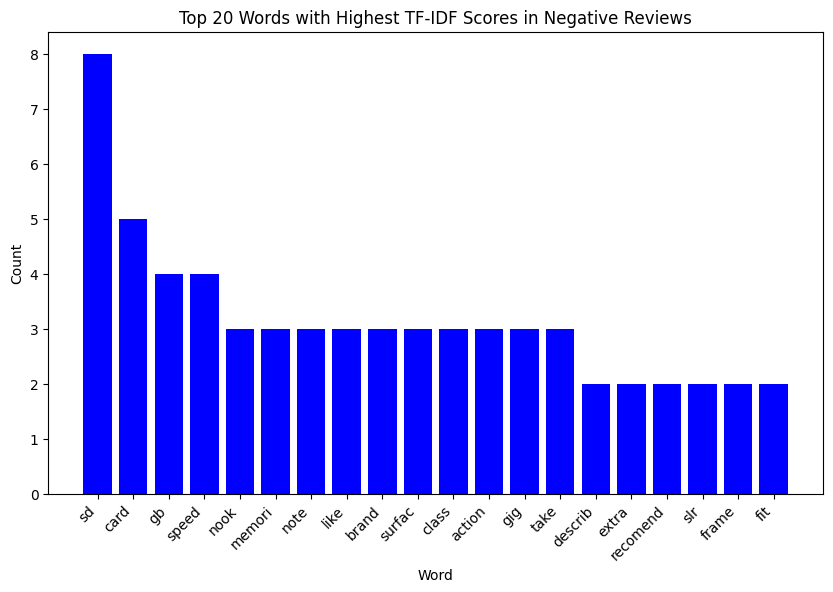

In [ ]:
import matplotlib.pyplot as plt


# Filter the DataFrame to include only negative reviews
negative_reviews_df = df[df['encoded_sentiment'] == 0]

# Select only the columns corresponding to negative reviews
negative_tfidf_df = tfidf_df.loc[negative_reviews_df.index]

# Identify the column with the highest TF-IDF score for each word
top_words = negative_tfidf_df.idxmax(axis=1)

# Display the top N words with the highest TF-IDF scores (adjust N as needed)
top_words_count = 20
top_words = top_words.value_counts().head(top_words_count)

# Plot the top N words with the highest TF-IDF scores
plt.figure(figsize=(10, 6))
plt.bar(top_words.index, top_words.values, color='blue')
plt.title(f'Top {top_words_count} Words with Highest TF-IDF Scores in Negative Reviews')
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


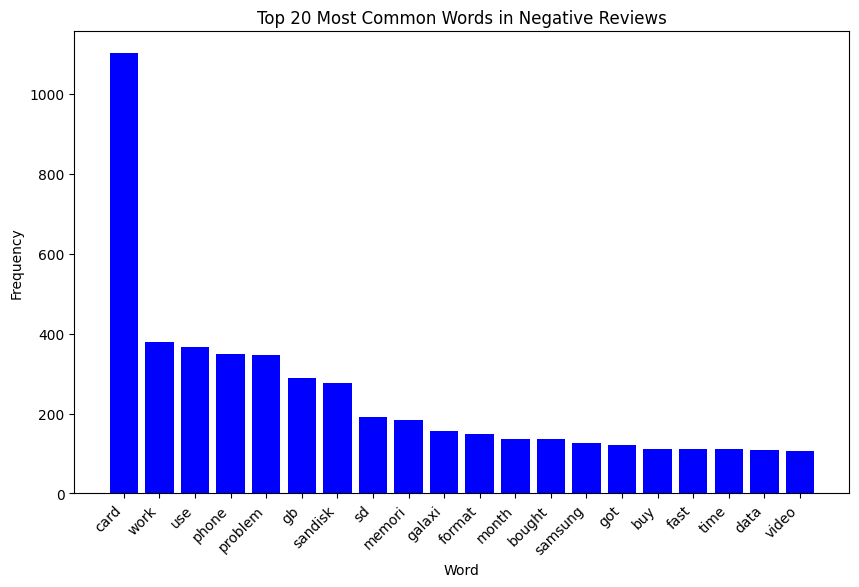

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Filter the DataFrame to include only negative reviews
negative_reviews_df = df[df['encoded_sentiment'] == 0]

# Concatenate negative reviews into a single string
negative_reviews_text = ' '.join(negative_reviews_df['preprocessed_review'].values)

# Tokenize the text and remove stop words
vectorizer = CountVectorizer(stop_words='english')
word_counts = vectorizer.fit_transform([negative_reviews_text])

# Create a DataFrame to store word frequencies
word_frequency_df = pd.DataFrame({
    'Word': vectorizer.get_feature_names_out(),
    'Frequency': word_counts.sum(axis=0).A1
})

# Sort the DataFrame by word frequency in descending order
word_frequency_df = word_frequency_df.sort_values(by='Frequency', ascending=False)

# Display the top N most common words (adjust N as needed)
top_words_count = 20
top_words = word_frequency_df.head(top_words_count)

# Plot the top N most common words
plt.figure(figsize=(10, 6))
plt.bar(top_words['Word'], top_words['Frequency'], color='blue')
plt.title(f'Top {top_words_count} Most Common Words in Negative Reviews')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
# Filter the DataFrame to include only negative reviews
negative_reviews_df = df[df['encoded_sentiment'] == 0]

# Filter negative reviews that contain the word 'card'
negative_reviews_with_card_df = negative_reviews_df[negative_reviews_df['preprocessed_review'].str.contains('card')] #you can change the keyword to further analyze the negative reviews

4
negative_reviews_with_card_df['reviewText'].iloc[345]

'Most of my reviews are positive.  This product failed (could not read on my device (a Galaxy S3) nor on my computer with 2 different readers) in less than 30 days.  The customer support is also unhelpful, as they would only replace the card after many questions, they would not provide a refund (I did not want a replacement of a card that failed so quickly).I would suggest buying a different card, it is not worth the hassle and lost data to save a couple of dollars with buying this one.'

<ipython-input-45-858c9e15cbf8>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='predicted_sentiment', y='overall', data=df, order=sentiment_order, palette='viridis', ci=None)


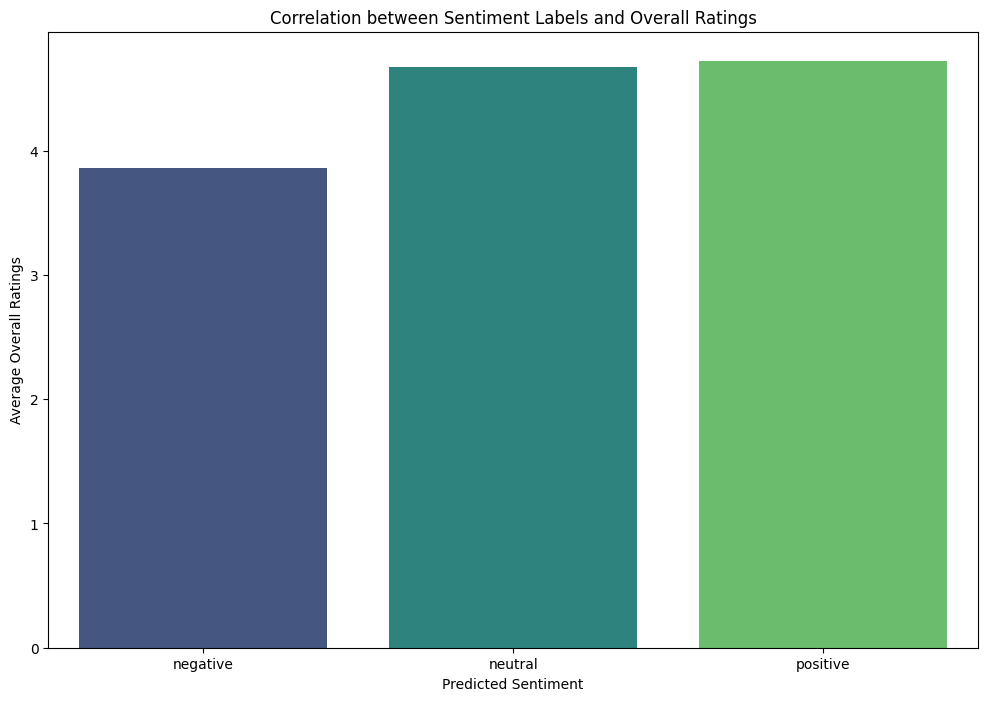

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 8))

# Define the order of sentiment categories
sentiment_order = ['negative', 'neutral', 'positive']

# Grouped bar chart with specified order
sns.barplot(x='predicted_sentiment', y='overall', data=df, order=sentiment_order, palette='viridis', ci=None)


plt.title('Correlation between Sentiment Labels and Overall Ratings')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Average Overall Ratings')
plt.show()